In [2]:
import pybullet
import time
import pybullet_data
import numpy as np

pybullet build time: Oct 11 2021 20:59:39


In [3]:
phisycsClient = pybullet.connect(pybullet.GUI)
pybullet.setAdditionalSearchPath(pybullet_data.getDataPath())

startThreads creating 1 threads.
starting thread 0
started thread 0 
argc=2
argv[0] = --unused
argv[1] = --start_demo_name=Physics Server
ExampleBrowserThreadFunc started
X11 functions dynamically loaded using dlopen/dlsym OK!
X11 functions dynamically loaded using dlopen/dlsym OK!
Creating context
Created GL 3.3 context
Direct GLX rendering context obtained
Making context current
GL_VENDOR=nouveau
GL_RENDERER=NV168
GL_VERSION=4.3 (Core Profile) Mesa 21.0.3
GL_SHADING_LANGUAGE_VERSION=4.30
pthread_getconcurrency()=0
Version = 4.3 (Core Profile) Mesa 21.0.3
Vendor = nouveau
Renderer = NV168
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
started thread 0 
MotionThreadFunc thread started
ven = nouveau
ven = nouveau


In [60]:
pybullet.resetSimulation()
planeID = pybullet.loadURDF("plane.urdf")
pybullet.setGravity(0,0,-9.81)
robotID = pybullet.loadURDF("urdf/surenav_urdf_nolink.urdf",
                         [0.0,0.0,0.91],useFixedBase = 0)
pybullet.setRealTimeSimulation(0)

In [38]:
for index in range(pybullet.getNumJoints(robotID)):
    print(pybullet.getJointInfo(robotID,index)[0:2],
          pybullet.getJointState(robotID,pybullet.getJointInfo(robotID,index)[0])[0])

(0, b'r_hip_yaw_joint') 0.0
(1, b'r_hip_roll_joint') 0.0
(2, b'r_hip_pitch_joint') 0.0
(3, b'r_knee_joint') 0.0
(4, b'r_ankle_pitch_joint') 0.0
(5, b'r_ankle_roll_joint') 0.0
(6, b'l_hip_yaw_joint') 0.0
(7, b'l_hip_roll_joint') 0.0
(8, b'l_hip_pitch_joint') 0.0
(9, b'l_knee_joint') 0.0
(10, b'l_ankle_pitch_joint') 0.0
(11, b'l_ankle_roll_joint') 0.0


In [39]:
position, orientation = pybullet.getBasePositionAndOrientation(robotID)
print('Positions:\n',position)
print('Orientation:\n',pybullet.getEulerFromQuaternion(orientation))

Positions:
 (0.00818, -0.00179, 1.07869)
Orientation:
 (0.0, -0.0, 0.0)


In [9]:
pybullet.disconnect()

numActiveThreads = 0
stopping threads
destroy semaphore
semaphore destroyed
Thread with taskId 0 exiting
Thread TERMINATED
destroy main semaphore
main semaphore destroyed
finished
numActiveThreads = 0
btShutDownExampleBrowser stopping threads
Thread with taskId 0 exiting
Thread TERMINATED
destroy semaphore
semaphore destroyed
destroy main semaphore
main semaphore destroyed


Generate Trajectories

In [11]:
from trajectory.Robot import *
from trajectory.Ankle import *
from trajectory.DCM import *

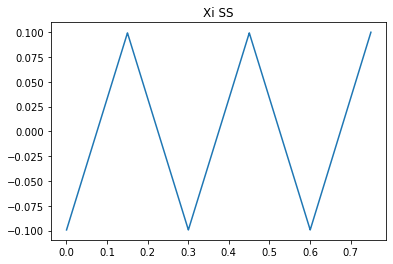

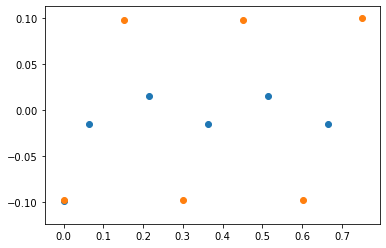

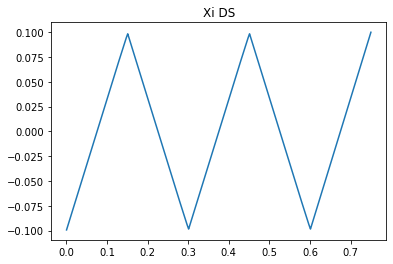

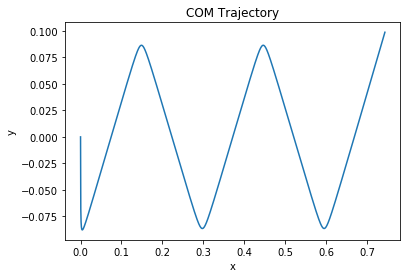

In [69]:
dt = 1/240
planner = DCMPlanner(0.68, 1.5, 0.45,dt)
rF =np.array([[0.0,-0.1,0.0],
             [0.15,0.1,0.0],
             [0.3,-0.1,0.0],
             [0.45,0.1,0.0],
             [0.6,-0.1,0.0],
             [0.75,0.1,0.0]])
planner.setFoot(rF)
xi_trajectory = planner.getXiTrajectory()
com_0 = np.array([0.0,0.0,planner.deltaZ_])
com_trajectory = planner.getCoMTrajectory(com_0)

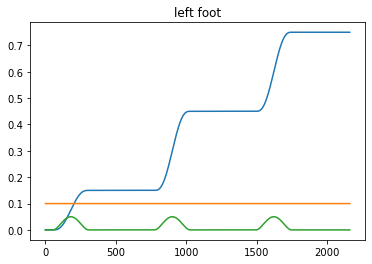

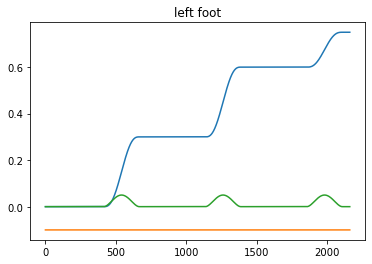

In [70]:
anklePlanner = Ankle(planner.tStep_, planner.tDS_, 0.05,dt)
rF =np.array([[0.0,0.1,0.0],
             [0.0,-0.1,0.0],
             [0.15,0.1,0.0],
             [0.3,-0.1,0.0],
             [0.45,0.1,0.0],
             [0.6,-0.1,0.0],
             [0.75,0.1,0.0],
             [0.75,-0.1,0.0]])
anklePlanner.updateFoot(rF)
anklePlanner.generateTrajectory()
left = np.array(anklePlanner.getTrajectoryL())
right = np.array(anklePlanner.getTrajectoryR())

Walk

In [76]:
surena = Robot(shank = 0.35, hip = 0.36, pelvis_lengt = 0.1)
time.sleep(1)
for i in range(240):
        All = surena.doIK([0.0,0.0,0.91 - (i/240)* (0.91-planner.deltaZ_)], np.eye(3),[0.0,0.1,0.0], np.eye(3),[0.0, -0.1,0.0], np.eye(3))
        leftConfig = All[6:12]
        rightConfig = All[0:6]
        for index in range (6):
            pybullet.setJointMotorControl2(bodyIndex=robotID,
                                    jointIndex=index,
                                    controlMode=pybullet.POSITION_CONTROL,
                                    targetPosition = rightConfig[index])
            pybullet.setJointMotorControl2(bodyIndex=robotID,
                                    jointIndex=index + 6,
                                    controlMode=pybullet.POSITION_CONTROL,
                                    targetPosition = leftConfig[index])
        pybullet.stepSimulation()
#for i in range(int(240 * (rF.shape[0] - 2) * planner.tStep_)):
#    for index in range (6):
#        All = surena.doIK(com_trajectory[i], np.eye(3),left[i], np.eye(3),right[i], np.eye(3))
#        leftConfig = All[6:12]
#        rightConfig = All[0:6]
#        pybullet.setJointMotorControl2(bodyIndex=robotID,
#                                jointIndex=index,
#                                controlMode=pybullet.POSITION_CONTROL,
#                                targetPosition = rightConfig[index])
#        pybullet.setJointMotorControl2(bodyIndex=robotID,
#                                jointIndex=index + 6,
#                                controlMode=pybullet.POSITION_CONTROL,
#                                targetPosition = leftConfig[index])
#        pybullet.stepSimulation()

In [6]:
pybullet.resetSimulation()
planeID = pybullet.loadURDF("plane.urdf")
pybullet.setGravity(0,0,-9.81)
robotID = pybullet.loadURDF("urdf/surenav_urdf_nolink.urdf",
                         [0.0,0.0,0.95],useFixedBase = 1)
pybullet.setRealTimeSimulation(0)

In [8]:
pybullet.setRealTimeSimulation(1)
pybullet.setJointMotorControl2(bodyIndex=robotID,
                                jointIndex=5,
                                controlMode=pybullet.POSITION_CONTROL,
                                targetPosition = 0.5)